# Labor 1. 
2025.09.18.
ECSGGY

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [260]:
images_raw = [Image.open(f"images_labor1/{filename}") for filename in os.listdir("images_labor1")]
images = np.stack([np.asarray(img)[...,:3] for img in images_raw])

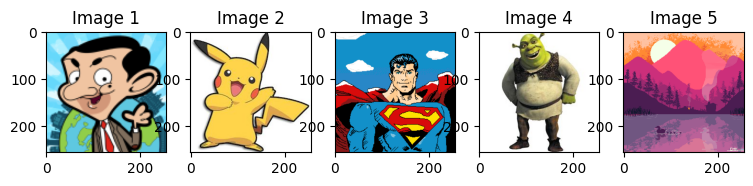

In [362]:
fig = plt.figure(figsize=(9, len(images)*3))

for index, image in enumerate(images):
    ax = fig.add_subplot(1,len(images),index+1)
    ax.imshow(image)
    ax.set_title(f'Image {index+1}')

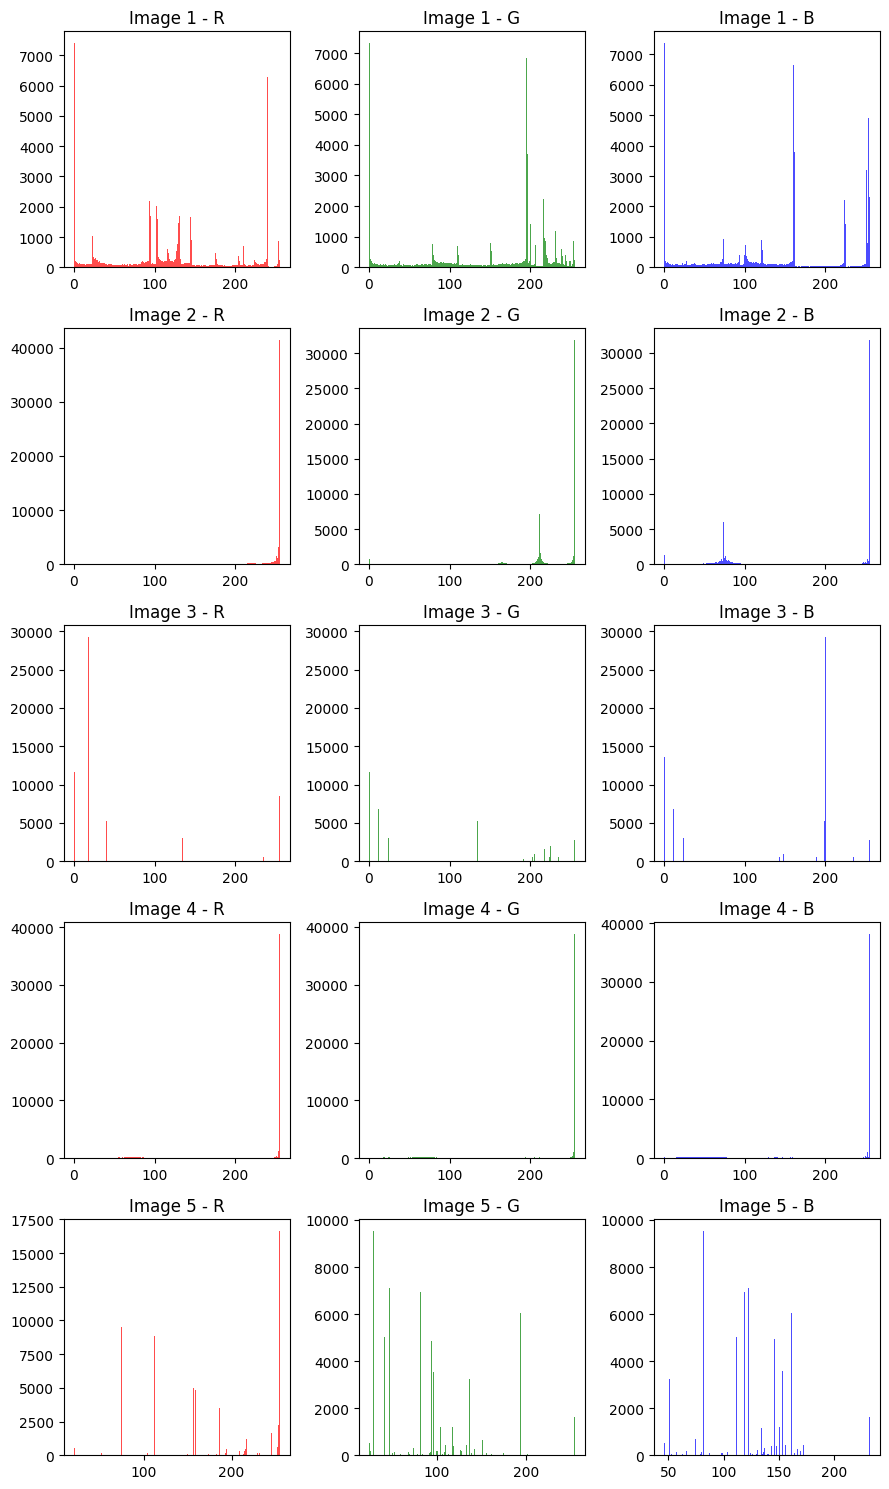

In [351]:
fig = plt.figure(figsize=(9, len(images)*3))

for index, image in enumerate(images):
    for color in range(3):   
        ax = fig.add_subplot(len(images), 3, index*3 + color + 1)
        ax.hist(image[...,color].ravel(), bins=256, color=['red','green','blue'][color], alpha=0.7)
        ax.set_title(f'Image {index+1} - {["R","G","B"][color]}')

plt.tight_layout()
plt.show()


In [286]:
for index, image in enumerate(images):
    print(f"{index+1}.image")
    for color in range(3):   
       print(f"Color: {color}, mean: {image[...,color].mean()}, std: {image[...,color].std()}")

1.image
Color: 0, mean: 123.60208129882812, std: 82.54101366786445
Color: 1, mean: 148.63722229003906, std: 82.05103648644634
Color: 2, mean: 141.61019897460938, std: 88.5618718260982
2.image
Color: 0, mean: 232.5417022705078, std: 55.65767452760693
Color: 1, mean: 216.4385223388672, std: 60.35462779261805
Color: 2, mean: 174.21701049804688, std: 91.89205584776147
3.image
Color: 0, mean: 75.82655334472656, std: 96.11644973185197
Color: 1, mean: 110.16624450683594, std: 78.53595874820208
Color: 2, mean: 131.37277221679688, std: 95.16263008863355
4.image
Color: 0, mean: 205.30810546875, std: 78.38198619259842
Color: 1, mean: 203.45834350585938, std: 79.70622657162536
Color: 2, mean: 191.69024658203125, std: 88.71365480529931
5.image
Color: 0, mean: 179.0444793701172, std: 67.14937432795215
Color: 1, mean: 90.60540771484375, std: 54.326422075740844
Color: 2, mean: 123.02970886230469, std: 35.04949571991607


In [ ]:
for index, image in enumerate(images):
    print(f"{index+1}.image")
    for color in range(3):
        mean = image[...,color].ravel().mean()
        std = image[...,color].ravel().std()
        norm_img = (image[...,color] - mean) / std
        print(f"Color: {color}, normalized mean: {np.round(norm_img.mean(),10)}, normalized std: {norm_img.std()}")
plt.tight_layout()
plt.show()

1.image
Color: 0, normalized mean: 0.0, normalized std: 1.0
Color: 1, normalized mean: 0.0, normalized std: 1.0
Color: 2, normalized mean: 0.0, normalized std: 1.0
2.image
Color: 0, normalized mean: -0.0, normalized std: 0.9999999999999999
Color: 1, normalized mean: -0.0, normalized std: 1.0
Color: 2, normalized mean: 0.0, normalized std: 0.9999999999999999
3.image
Color: 0, normalized mean: 0.0, normalized std: 0.9999999999999999
Color: 1, normalized mean: -0.0, normalized std: 1.0
Color: 2, normalized mean: 0.0, normalized std: 1.0
4.image
Color: 0, normalized mean: 0.0, normalized std: 0.9999999999999999
Color: 1, normalized mean: 0.0, normalized std: 0.9999999999999999
Color: 2, normalized mean: -0.0, normalized std: 1.0
5.image
Color: 0, normalized mean: -0.0, normalized std: 1.0
Color: 1, normalized mean: 0.0, normalized std: 1.0
Color: 2, normalized mean: 0.0, normalized std: 0.9999999999999999


<Figure size 640x480 with 0 Axes>

## 2. Audio exercise

### Data loading

In [299]:
import librosa
sounds_filename = os.listdir("sounds")
sounds = [librosa.load(f"sounds/{sound}") for sound in sounds_filename]

In [333]:
def spectogram(sound):
    X = librosa.stft(sound)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(20, 5))
    librosa.display.specshow(Xdb, x_axis='time', y_axis='hz')
    plt.colorbar()

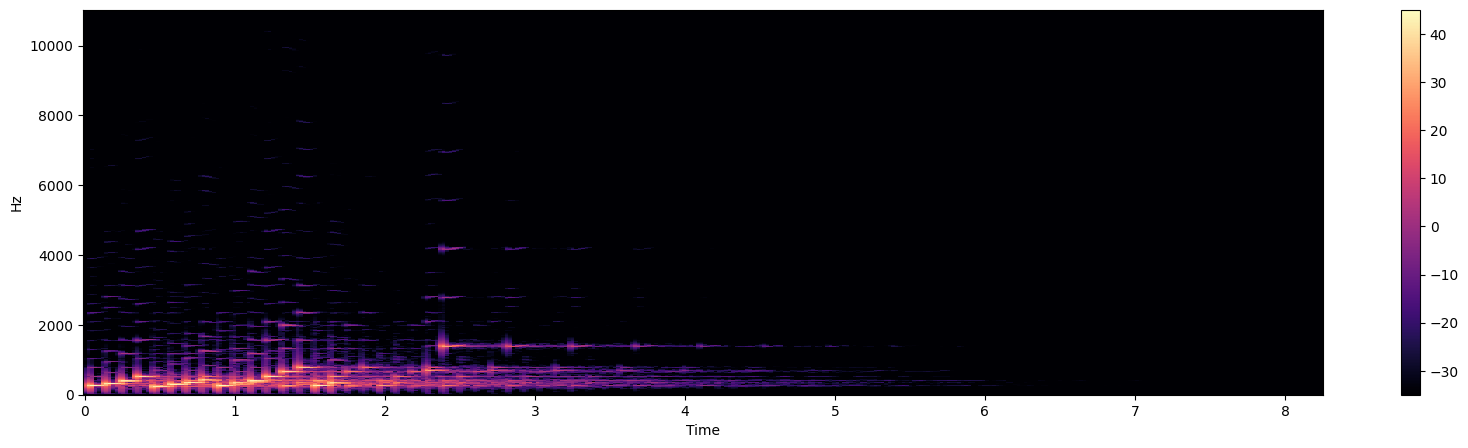

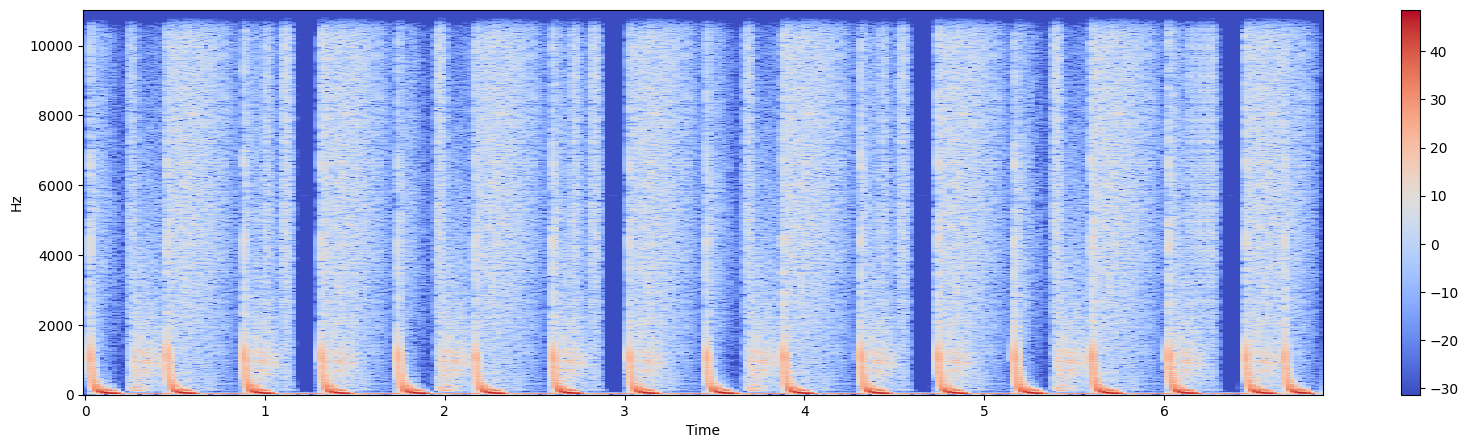

In [334]:
for sound in sounds:
    spectogram(sound[0])

0.sound:
 Mean: 5.979832451430411e-08, std : 0.08904273808002472, 
 Mean: 1.0670585526284526e-09, std: 0.9999999403953552
1.sound:
 Mean: 4.0766357756183424e-07, std : 0.21118591725826263, 
 Mean: -5.224201959919128e-09, std: 1.0


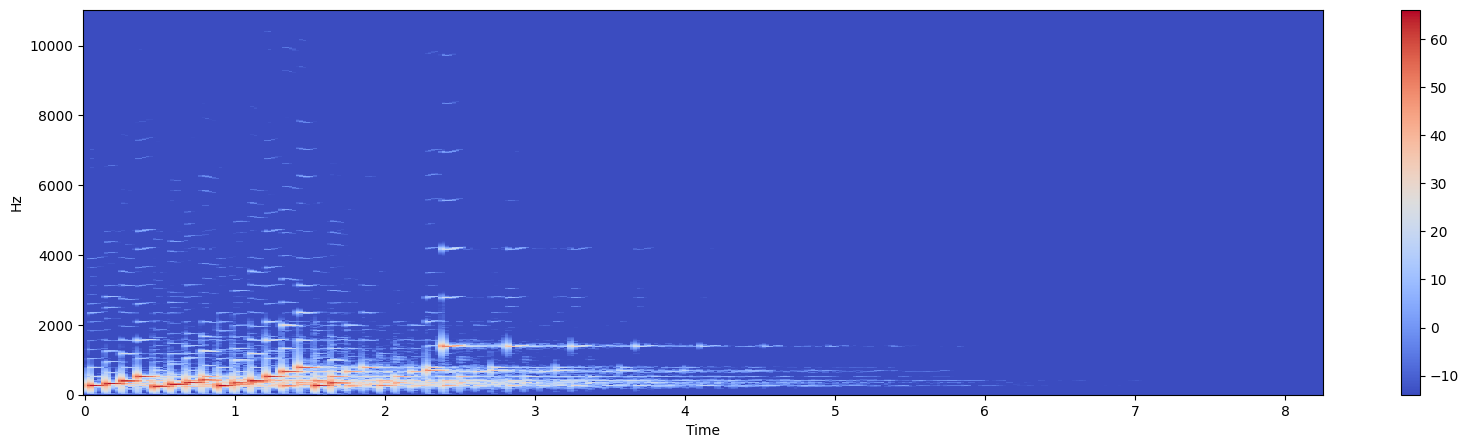

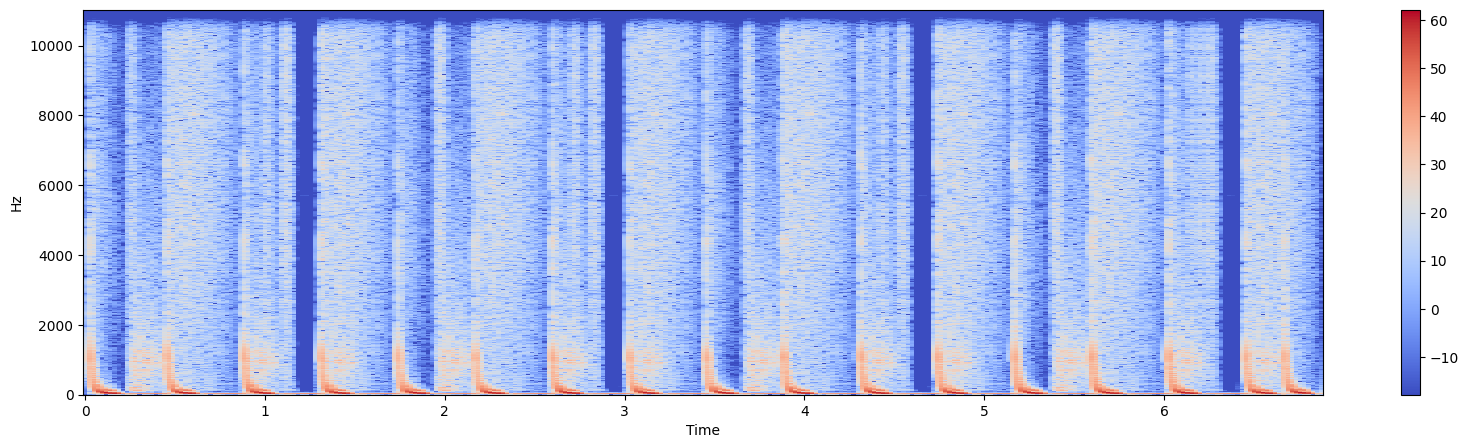

In [340]:
for index,sound in enumerate(sounds):
    mean = sound[0].mean()
    std = sound[0].std()
    norm_sound = ((sound[0] - mean) / std)
    print(f"{index}.sound:\n Mean: {mean}, std : {std}, \n Mean: {norm_sound.mean()}, std: {norm_sound.std()}")
    spectogram(norm_sound)

## 3. Szöveges tartalom 

In [344]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from collections import Counter
import string

In [ ]:
url = "http://smartlab.tmit.bme.hu/oktatas-deep-learning"
response = requests.get(url)
response.raise_for_status()  

soup = BeautifulSoup(response.text, "html.parser")
text = soup.get_text(separator=" ", strip=True)

print(text)


 Deep Learning a gyakorlatban Python és LUA alapon - VITMAV45 | SmartLab, BME TMIT Languages Magyar English Menü be/kikapcsolás RÓLUNK Laborunkról Munkatársaink Média megjelenések MEGOLDÁSAINK Profivox magyar nyelvű felolvasó (korpuszos) Profivox magyar nyelvű felolvasó (DNN) Profivox magyar nyelvű felolvasó (HMM) Profivox magyar nyelvű felolvasó (diádos,triádos) StrokeAid Alkalmazások Jaws for Windows integráció Időjárás mindenkinek (magyar, Windows 8) AALFred (5 nyelven, Windows 8.1) Robobraille Beszélő ATM-ek Gyógyszervonal (OGYI) Árlista felolvasó (T-mobile) Keleti pályaudvar bemondórendszere Mindenség elmélete c. film gépi beszéd szinkron K+F Kutatási projektek (folyamatban) Kutatási projektek (befejezett) Publikációk (összes) Publikációk (kiemelt) Letölthető könyvek OKTATÁS KAPCSOLAT BLOG DEEP LEARNING A GYAKORLATBAN PYTHON ÉS LUA ALAPON Kezdőlap Oktatás Deep Learning Ha a tárgyról lecsúsztál, de szeretnél a deep learningbe belekezdeni, vagy már elvégezted a tárgyat és szeretnél 

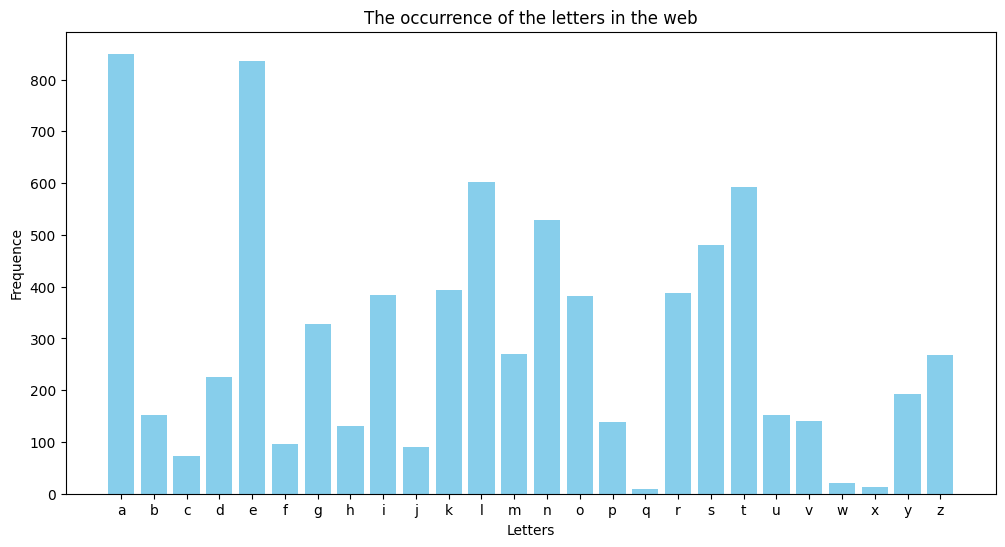

In [364]:
text_letters = [c.lower() for c in text if c.lower() in string.ascii_lowercase]
letter_counts = Counter(text_letters)


letters = sorted(letter_counts.keys())
counts = [letter_counts[l] for l in letters]

plt.figure(figsize=(12,6))
plt.bar(letters, counts, color='skyblue')
plt.xlabel("Letters")
plt.ylabel("Frequence")
plt.title("The occurrence of the letters in the web")
plt.show()

## Summary - Explanation
- 1. The histograms show the color distributions (R, G, B channels) for the five images.
Mr. Bean, Pikachu, Superman, Shrek image have sharp peaks,and they contain only a few dominant colors. For example, Pikachu has strong red and green peaks (yellow body), Superman has high red and blue values (suit and background), and Shrek is dominated by green. In contrast, the landscape image has smoother and wider histograms, reflecting the continuous color transitions of the sunset and nature scene. This illustrates the difference between simple cartoon images and complex natural images in terms of color distribution.
- 2. The figures show spectrograms of two different signals. The upper image has softer, and the bottom image has lots of repeating. However after the normalization, the bottom looks it did not changed a lot, but the background of the upper image changed, but the the place of the patterns remained. 
- 3. The web has lots of 'a' and 'e' letter, because we use lots of Hungarian words with 'a' and 'e' letters. And the rarest: w, q and x. In Hungarian language we don't use these a lot. 